In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and explore data:

In [33]:
data= pd.read_csv('ex1data2.txt', header=None, names=['x1', 'x2', 'y'])

In [34]:
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [35]:
data.shape

(47, 3)

In [36]:
X=data[['x1','x2']].values
Y =data['y'].values
m=len(data)

##Part 1 :Feature Normalization

In [37]:
mu=data.mean().values[:2]
sigma = np.std(X,axis=0)
# data.std().values[:2]

data['x1_norm']=(data['x1'] - mu[0])/sigma[0]
data['x2_norm']=(data['x2'] -mu[1])/sigma[1]

X_norm = data[['x1_norm','x2_norm']].values

data.head()

,x1,x2,y,x1_norm,x2_norm
0,2104,3,399900,0.131415,-0.226093
1,1600,3,329900,-0.509641,-0.226093
2,2400,3,369000,0.507909,-0.226093
3,1416,2,232000,-0.743677,-1.554392
4,3000,4,539900,1.271071,1.102205


Add intercept term to X:

In [38]:
X_norm= np.insert(X_norm, 0, 1,1)
X_norm[:2]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337]])

In [39]:
#choose some alpha value
alpha = 0.01
#Init Theta
theta = np.zeros(3)
iterations=400

##Part 2: Gradient Descent

Make sure your implementations of compute_cost and gradient_descent work when X has more than 2 columns

In [40]:
def compute_cost_multi(X,Y,theta):
    #COMPUTECOST Compute cost for linear regression
    #J=compute_cost(X,Y,theta) computes the cost of using theta as the 
    #parameter for linear regression to fit the data points in X and Y
    
    m=float(len(X))
    
    #Instructions:Compute the cost of a particular choice of theta
    J = 0 #initialize J
    
    for i, row in enumerate(X):
        J += (np.dot(theta.transpose(),X[i])-Y[i])**2
        
    J/= (2*m)
    
    return J

Cost at initial theta:

In [41]:
compute_cost_multi(X_norm, Y, theta)

65591548106.457443

Run gradient descent:

In [56]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    # theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha
    
    m = float(len(X))
    def sumterm(X,y,theta,j):
        dJ = 0
        for i,row in enumerate(X):
            dJ += (np.dot(theta.transpose(),X[i])-Y[i])*X[i,j]
        dJ /= m
        return dJ
            
    
    # Initialize
    J_history = np.zeros((num_iters,))
    T_history = np.zeros((num_iters,len(theta)))
    
    for i in range(num_iters):
        T_history[i] = theta

        updated_params = theta.copy()
        for j in range(len(theta)):
            updated_params[j] = theta[j] - alpha * sumterm(X,y,theta,j)
        theta = updated_params
#         theta = theta - (alpha/m) * np.transpose(X*np.mat(theta).transpose()-np.mat(y).transpose()) * X
                   
        J_history[i] = compute_cost_multi(X, y, theta)
        
    return theta, J_history, T_history

In [57]:
theta = np.zeros(3)
theta, J_history, T_history= gradient_descent_multi(X_norm, Y, theta, alpha, iterations)
theta

array([ 334302.06399328,   99411.44947359,    3267.01285407])

Convergence graph:

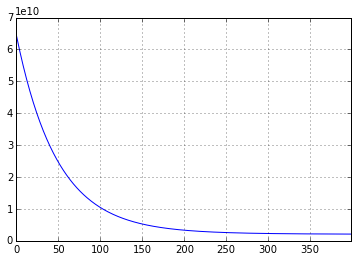

In [58]:
pd.Series(J_history).plot()

[ 340412.65345227  109398.90129361   -6529.45967813]


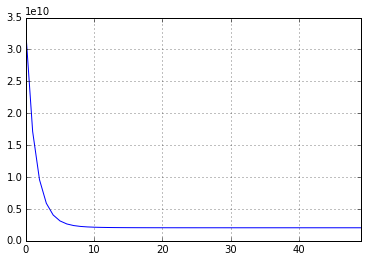

In [59]:
theta = np.zeros(3)
theta, J_history, T_history = gradient_descent_multi(X_norm, Y, theta, 0.3, 50)
print theta
pd.Series(J_history).plot()

Estimate the price of a 1650sqft, 3 bedroom house:

In [60]:
price = np.array([1,(1650-mu[0])/sigma[0],(3- mu[1])/sigma[1]]).dot(theta)
price

293092.21273075527

###Part 3:Normal Equations
The following code computes the closed form solution for linear regression using normal equations. You should complete the code in normal_eqn().
After doing so, you should complete this code to predict the price of 1650 sq-ft, 3br house.

In [61]:
data = pd.read_csv('ex1data2.txt', header=None, names=['x1', 'x2', 'y'])
X = data[['x1', 'x2']].values
Y = data['y'].values
X = np.insert(X, 0, 1,1)

In [62]:
def normal_eqn(X,y):
    #NORMALEQN Computes the closed-form solution to linear regression
    
    theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    return theta
    

In [63]:
theta = normal_eqn(X, Y)

Theta found using the normal equations:

In [64]:
theta

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

Price estimation of a 1650sqft house with 3 bedrooms, using theta from the normal equations:

In [65]:
price = np.array([1,1650,3]).dot(theta)
price

293081.46433489589

###Use scipy.optimize import fmin

In [161]:
from scipy.optimize import fmin

In [162]:
x_new=data[['x1','x2']].values
x_new=np.insert(x_new, 0, 1,1)
y_new=data['y'].values

In [163]:
def ss(theta,x,y):
    J=0
    for i in range(len(x)):
        J+= (np.dot(theta.transpose(),X[i])-Y[i])**2
    return J
        
    
    

In [164]:
theta=np.array([0,0,1])
theta=fmin(ss,theta, args=(x_new,y_new))

In [165]:
theta

array([ 92165.21469922,    139.61551565, -10138.41829638])

In [166]:
price=np.array([1,1650,3]).dot(theta)
price

292115.56062457617

###Compare 3 different methods

| Methods           |Theta               | x1  | x2  |Prediction|
|-------------------|--------------------|-----|-----|----------|
|Gradient Descent   |        X           |1650 | 3   |293092.212|
|Normal Equation    |(89597, 139,  -8738)|1650 | 3   |293081.464|
|Scipy.optmize fmin |(92165, 139, -10138)|1650 | 3   |292115.560|